# pyVolcano
Volcano plot working over matplotlib, numpy and pandas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
pval_col = 'padj'
gene_col = 'row'
log_col = 'log2FoldChange'
pval_thresh = 0.01
log_thresh = 1
up_color = 'green'
down_color = 'red'
title = 'No_cell_comp'
n_names2show = 10

In [9]:
in_file = '../results/datasets/DE_baselineMTX_162.tsv'
DF = pd.read_csv(in_file,sep='\t',index_col=0).reset_index(drop=True)
DF = DF.loc[DF['design']=='No_cell_comp']
DF

,row,log2FoldChange,padj,design,DE
0,ENSG00000278267,-0.175689,0.701615,No_cell_comp,NO
1,ENSG00000238009,-0.331684,0.481832,No_cell_comp,NO
2,ENSG00000239906,-0.338826,0.587608,No_cell_comp,NO
3,ENSG00000241860,-0.380158,0.188621,No_cell_comp,NO
4,ENSG00000222623,0.121562,0.938411,No_cell_comp,NO
...,...,...,...,...,...
28354,ENSG00000198695,1.757460,0.000385,No_cell_comp,UP
28355,ENSG00000210194,3.145639,0.001141,No_cell_comp,UP
28356,ENSG00000198727,0.005482,0.994661,No_cell_comp,NO
28357,ENSG00000210195,-0.273726,0.714065,No_cell_comp,NO


## Sort DF properly

In [10]:
DF.insert(2,'absLogF',np.absolute(DF.loc[:,'log2FoldChange']))
DF

,row,log2FoldChange,absLogF,padj,design,DE
0,ENSG00000278267,-0.175689,0.175689,0.701615,No_cell_comp,NO
1,ENSG00000238009,-0.331684,0.331684,0.481832,No_cell_comp,NO
2,ENSG00000239906,-0.338826,0.338826,0.587608,No_cell_comp,NO
3,ENSG00000241860,-0.380158,0.380158,0.188621,No_cell_comp,NO
4,ENSG00000222623,0.121562,0.121562,0.938411,No_cell_comp,NO
...,...,...,...,...,...,...
28354,ENSG00000198695,1.757460,1.757460,0.000385,No_cell_comp,UP
28355,ENSG00000210194,3.145639,3.145639,0.001141,No_cell_comp,UP
28356,ENSG00000198727,0.005482,0.005482,0.994661,No_cell_comp,NO
28357,ENSG00000210195,-0.273726,0.273726,0.714065,No_cell_comp,NO


In [12]:
DF = DF.sort_values(['padj','log2FoldChange'],ascending=[True,False]).reset_index(drop=True)
DF

,row,log2FoldChange,absLogF,padj,design,DE
0,ENSG00000162391,19.735350,19.735350,2.622415e-101,No_cell_comp,UP
1,ENSG00000181965,19.669986,19.669986,9.858486e-95,No_cell_comp,UP
2,ENSG00000214860,19.292137,19.292137,4.212448e-89,No_cell_comp,UP
3,ENSG00000225206,19.357494,19.357494,1.905736e-79,No_cell_comp,UP
4,ENSG00000230960,18.649465,18.649465,5.849026e-73,No_cell_comp,UP
...,...,...,...,...,...,...
28354,ENSG00000254044,-1.119634,1.119634,NaN,No_cell_comp,NO
28355,ENSG00000227409,-1.259568,1.259568,NaN,No_cell_comp,NO
28356,ENSG00000230290,-1.289294,1.289294,NaN,No_cell_comp,NO
28357,ENSG00000259995,-1.381821,1.381821,NaN,No_cell_comp,NO


## Insert color

In [13]:
DF.insert(4,'color','black')
DF

,row,log2FoldChange,absLogF,padj,color,design,DE
0,ENSG00000162391,19.735350,19.735350,2.622415e-101,black,No_cell_comp,UP
1,ENSG00000181965,19.669986,19.669986,9.858486e-95,black,No_cell_comp,UP
2,ENSG00000214860,19.292137,19.292137,4.212448e-89,black,No_cell_comp,UP
3,ENSG00000225206,19.357494,19.357494,1.905736e-79,black,No_cell_comp,UP
4,ENSG00000230960,18.649465,18.649465,5.849026e-73,black,No_cell_comp,UP
...,...,...,...,...,...,...,...
28354,ENSG00000254044,-1.119634,1.119634,NaN,black,No_cell_comp,NO
28355,ENSG00000227409,-1.259568,1.259568,NaN,black,No_cell_comp,NO
28356,ENSG00000230290,-1.289294,1.289294,NaN,black,No_cell_comp,NO
28357,ENSG00000259995,-1.381821,1.381821,NaN,black,No_cell_comp,NO


In [14]:
down = (DF.loc[:,pval_col]<pval_thresh)&(DF.loc[:,log_col]<-log_thresh)
up = (DF.loc[:,pval_col]<pval_thresh)&(DF.loc[:,log_col]>log_thresh)

In [15]:
DF.loc[down,'color'] = down_color
DF.loc[up,'color'] = up_color

In [16]:
DF

,row,log2FoldChange,absLogF,padj,color,design,DE
0,ENSG00000162391,19.735350,19.735350,2.622415e-101,green,No_cell_comp,UP
1,ENSG00000181965,19.669986,19.669986,9.858486e-95,green,No_cell_comp,UP
2,ENSG00000214860,19.292137,19.292137,4.212448e-89,green,No_cell_comp,UP
3,ENSG00000225206,19.357494,19.357494,1.905736e-79,green,No_cell_comp,UP
4,ENSG00000230960,18.649465,18.649465,5.849026e-73,green,No_cell_comp,UP
...,...,...,...,...,...,...,...
28354,ENSG00000254044,-1.119634,1.119634,NaN,black,No_cell_comp,NO
28355,ENSG00000227409,-1.259568,1.259568,NaN,black,No_cell_comp,NO
28356,ENSG00000230290,-1.289294,1.289294,NaN,black,No_cell_comp,NO
28357,ENSG00000259995,-1.381821,1.381821,NaN,black,No_cell_comp,NO


## Plot

Text(0.5, 1.0, 'No_cell_comp')

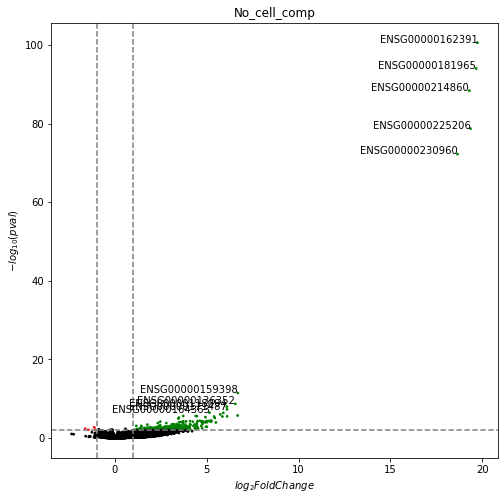

In [22]:
x = DF.loc[:,log_col].values
y = -np.log10(DF.loc[:,pval_col].values)
names = DF.loc[:,gene_col]

fig,ax = plt.subplots(figsize=[8,8])
ax.axhline(-np.log10(pval_thresh),color='gray',linestyle='--')
ax.axvline(log_thresh,color='gray',linestyle='--')
ax.axvline(-log_thresh,color='gray',linestyle='--')
ax.scatter(x,y,c=DF.loc[:,'color'].values,s=3)
for i in range(n_names2show):
    ha = "right" if x[i] > 0 else "left"
    ax.text(x[i], y[i] , s = names[i],ha=ha)
ax.set_ylabel(r'$-log_{10}(pval)$')
ax.set_xlabel(r'$log_2FoldChange$')
ax.set_title(title)